<a href="https://colab.research.google.com/github/vparro/controleAvancado/blob/master/SistemasLinearesLaplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas e instalações**

https://python-control.readthedocs.io/en/0.8.3/conventions.html

In [ ]:
!pip install slycot   # optional
!pip install control

     |████████████████████████████████| 1.6MB 6.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp36-cp36m-linux_x86_64.whl size=1413148 sha256=efa57b09abb156685fe2af5d57fd50c6368c2c0be9fd5edda44faf215de10f1e
  Stored in directory: /root/.cache/pip/wheels/a2/46/56/f82cbb2fd06556f4f3952a2eb2396e8fd29264fffecbaad3cf
Successfully built slycot
     |████████████████████████████████| 256kB 4.3MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=e0e7e415f6f75e1a4ef9c24333bc2a907a78aeb15759bcfdb835b1e3e9097033
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


In [ ]:
import control
from control.matlab import *
from control import ss, step_response, forced_response, impulse_response

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pylab as pp
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import integrate, interpolate
from scipy import optimize
from scipy.integrate import odeint

In [ ]:
# Importação de módulos e instalação de bibliotecas adicionais

# Importação do pacote matématico Math
import math

# Importação do pacote Pandas
import pandas as pd

# Importação dos pacotes NumPy e SciPy
import numpy as np
from scipy.interpolate import interp1d

# Importação do pacote PyPlot do MatPlotLib
import matplotlib.pyplot as plt

# Instalação e importação do pacote mpld3
!pip install mpld3
import mpld3

# importação do módulo timeit
import timeit

     |████████████████████████████████| 890kB 5.5MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp36-none-any.whl size=200618 sha256=d7d82a385882184fc0d3fb24b1260b36e924cf3d14493d21bb872dd8c2ee150d
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3


In [ ]:
# Diretiva do Notebook para exibição de gráficos inline
%matplotlib inline

# Configuração do tamanho dos gráficos
plt.rcParams["figure.figsize"] = (20,10)

# **Dados**

In [ ]:
\from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/14 - Roberto/stocks (1)/ITUB/itub3.csv')
df.tail(5)

,id_stock,datetime,number_of_stocks,nominal_price,aggressor
1649935,14999,2020-11-13 18:09:14,400,25.79,undefined
1649936,14999,2020-11-13 18:09:14,100,25.79,undefined
1649937,14999,2020-11-13 18:09:14,200,25.79,undefined
1649938,14999,2020-11-13 18:09:14,100,25.79,undefined
1649939,14999,2020-11-13 18:09:14,200,25.79,undefined


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
base_dt = pd.to_datetime('2019/01/01 00:00:00')

In [ ]:
df['seconds'] = (df['datetime'] - base_dt).dt.total_seconds()

In [ ]:
df.head()

,id_stock,datetime,number_of_stocks,nominal_price,aggressor,seconds
0,14999,2016-01-04 10:05:00,100,24.37,NaN,-94398900.0
1,14999,2016-01-04 10:05:00,100,24.37,NaN,-94398900.0
2,14999,2016-01-04 10:05:00,200,24.37,NaN,-94398900.0
3,14999,2016-01-04 10:05:00,200,24.37,NaN,-94398900.0
4,14999,2016-01-04 10:06:17,300,24.24,NaN,-94398823.0


In [ ]:
df.index=pd.to_datetime(df["datetime"])

In [ ]:
df.sample(5)

,id_stock,datetime,number_of_stocks,nominal_price,aggressor,seconds
datetime,,,,,,
2017-04-12 15:10:04,14999,2017-04-12 15:10:04,200,33.41,seller,-54290996.0
2020-03-16 16:25:55,14999,2020-03-16 16:25:55,100,23.21,buyer,38075155.0
2019-12-11 11:54:31,14999,2019-12-11 11:54:31,100,31.17,buyer,29764471.0
2019-08-05 16:24:44,14999,2019-08-05 16:24:44,100,29.61,seller,18721484.0
2020-04-07 10:35:34,14999,2020-04-07 10:35:34,100,22.23,buyer,39954934.0


In [ ]:
df.index.date

array([datetime.date(2016, 1, 4), datetime.date(2016, 1, 4),
       datetime.date(2016, 1, 4), ..., datetime.date(2020, 11, 13),
       datetime.date(2020, 11, 13), datetime.date(2020, 11, 13)],
      dtype=object)

## **Analisando 2020**

In [ ]:
sinal_exemplo = np.array(df.loc['2020'].iloc[::100]['nominal_price']) # serie temporal a ser analisada
sinal_exemplo = sinal_exemplo - np.mean(sinal_exemplo)

tempo_exemplo = np.array(df.loc['2020'].iloc[::100]['seconds']) # serie temporal a ser analisada

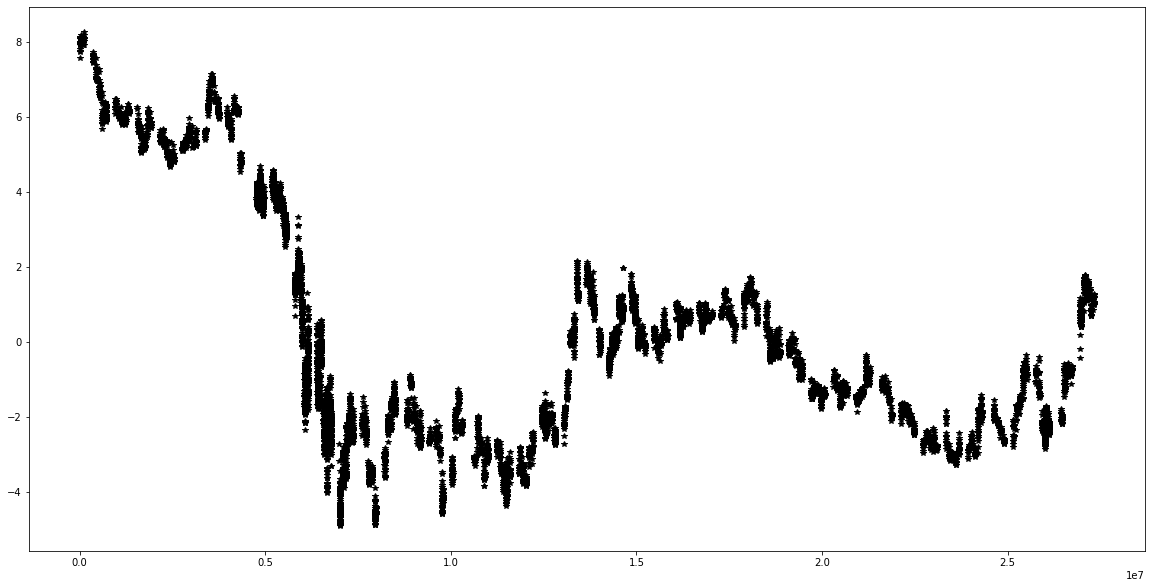

In [ ]:
plt.plot(tempo_exemplo- tempo_exemplo[0], sinal_exemplo, 'k*')

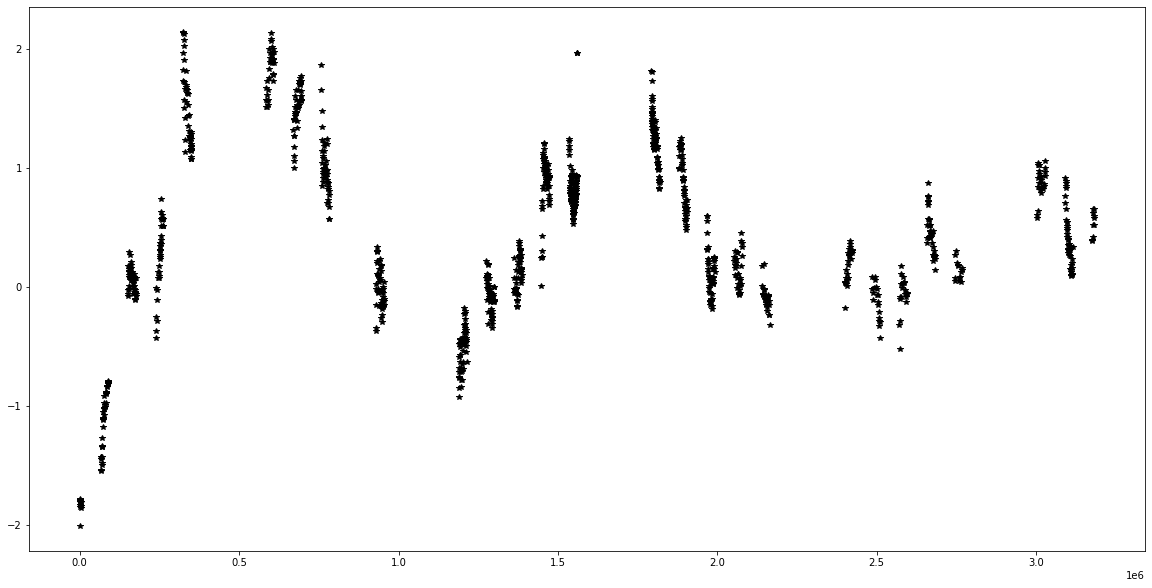

In [ ]:
INI = 4850
FIM = 6000
plt.plot(tempo_exemplo[INI:FIM]- tempo_exemplo[INI], sinal_exemplo[INI:FIM], 'k*')

In [ ]:
yd = sinal_exemplo[INI:FIM]
td = tempo_exemplo[INI:FIM]- tempo_exemplo[INI]

## **Analisando um trecho específico**

In [ ]:
df1 = df.groupby(df.index.date).mean()

In [ ]:
df1.head(5)

,id_stock,number_of_stocks,nominal_price,seconds
2016-01-04,14999.0,236.083916,23.745720,-9.438201e+07
2016-01-05,14999.0,186.153846,23.431262,-9.429995e+07
2016-01-06,14999.0,277.135678,23.441382,-9.420884e+07
2016-01-07,14999.0,266.865079,23.185278,-9.412526e+07
2016-01-08,14999.0,215.116279,23.284680,-9.403542e+07


In [ ]:
df1['date'] = pd.to_datetime(df1.index)
df1['year'], df1['month'] = df1['date'].dt.year, df1['date'].dt.month

In [ ]:
ano = df1[df1['year'] == 2020]

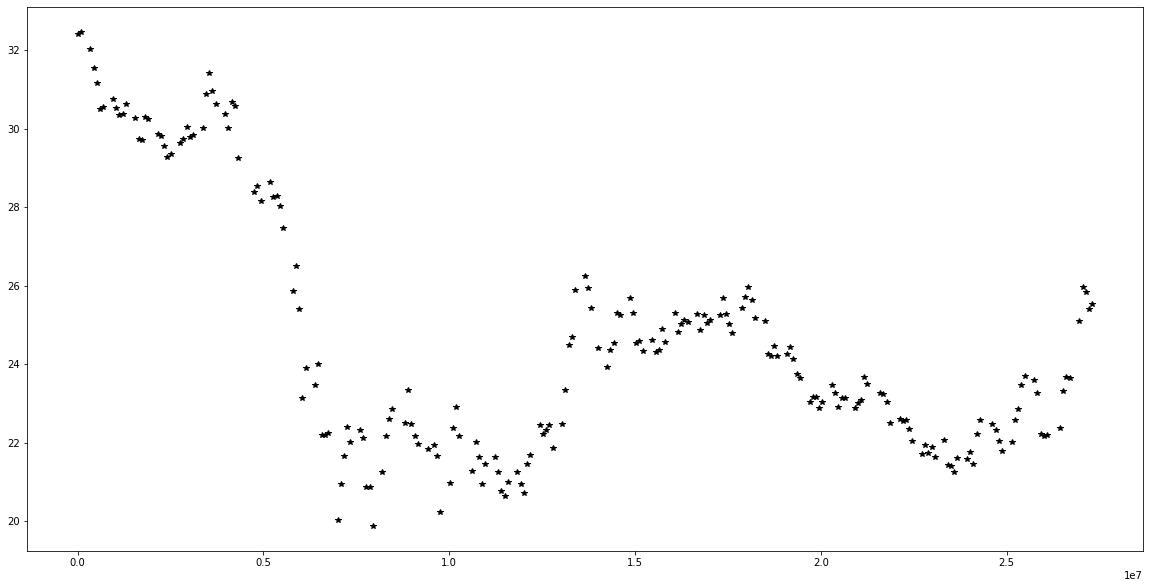

In [ ]:
tempo = ano['seconds']
preco = ano['nominal_price']

plt.plot(tempo - tempo[0], preco, 'k*')

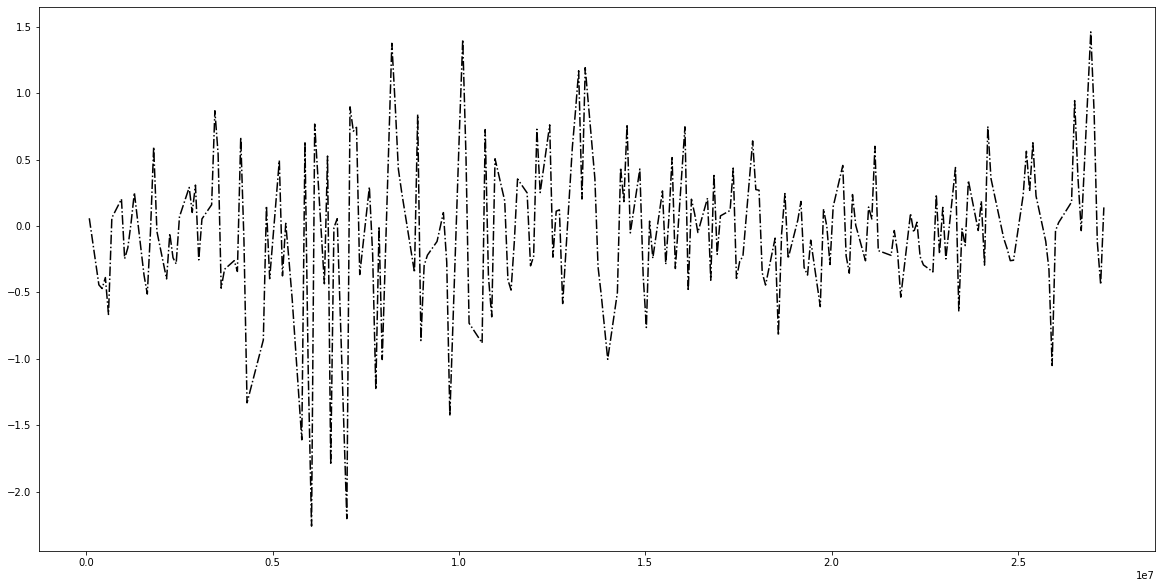

In [ ]:
plt.plot(tempo[1:] - tempo[0], np.diff(preco), 'k-.')

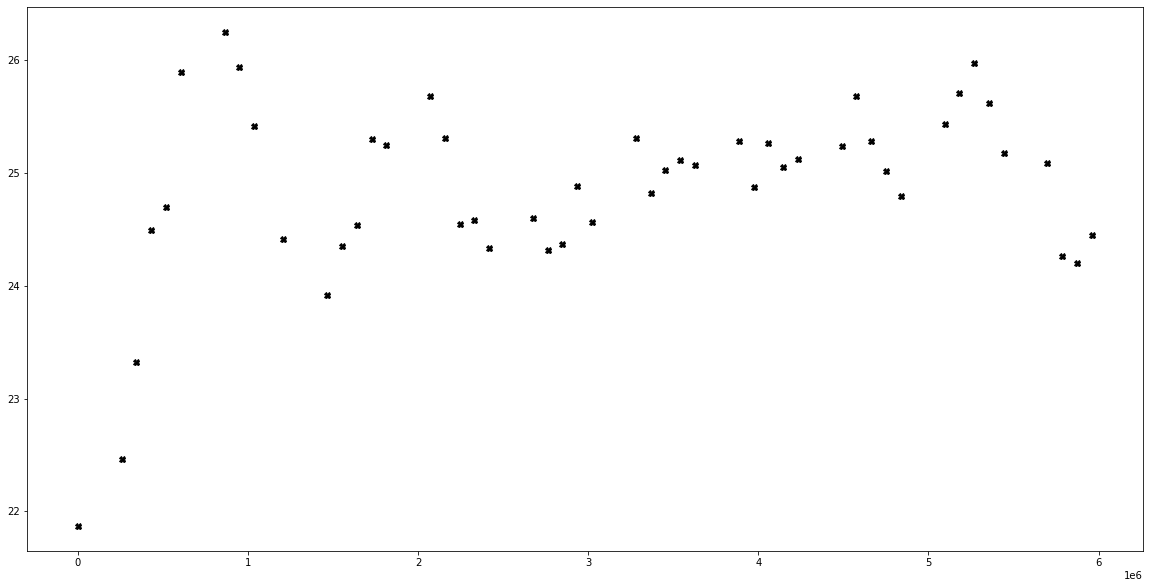

In [ ]:
INI = 101
FIM = 150
plt.plot(tempo[INI:FIM]- tempo[INI], preco[INI:FIM], 'kX')

In [ ]:
yd = preco[INI:FIM]
td = tempo[INI:FIM]- tempo[INI]

# **Interpolação para homogeneizar a amostragem**

In [ ]:
x, ind = np.unique(td, return_index = True)
y = yd[ind] 


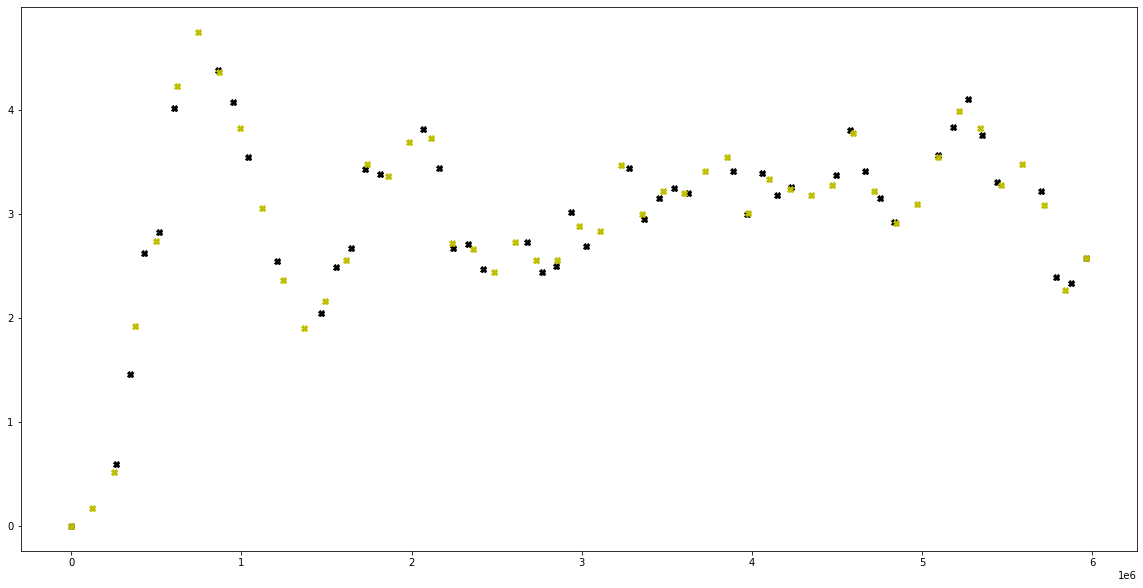

In [ ]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

flinear = interpolate.interp1d(x, y)
fcubic = interpolate.interp1d(x, y, kind='cubic')

xnew = np.linspace(0, x[-1], len(x))
ylinear = flinear(xnew)
ycubic = fcubic(xnew)
ycubic = ycubic - ycubic[0]
plt.plot(x, y-y[0], 'kX',xnew, ycubic, 'yX')
plt.show()

# **Tipos de resposta: impulso e degrau**

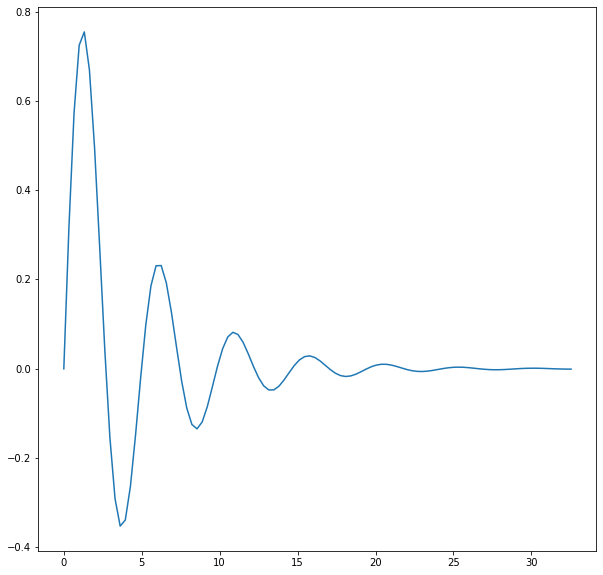

In [ ]:
num = [1,1]
den =[1,1,2,1]
sys = TransferFunction(num, den)

t, yout = impulse_response(sys)

plt.figure(figsize=(10,10))
plt.plot(t, yout)

In [ ]:
pole(sys)

In [ ]:
(2*np.pi)/1.30714128

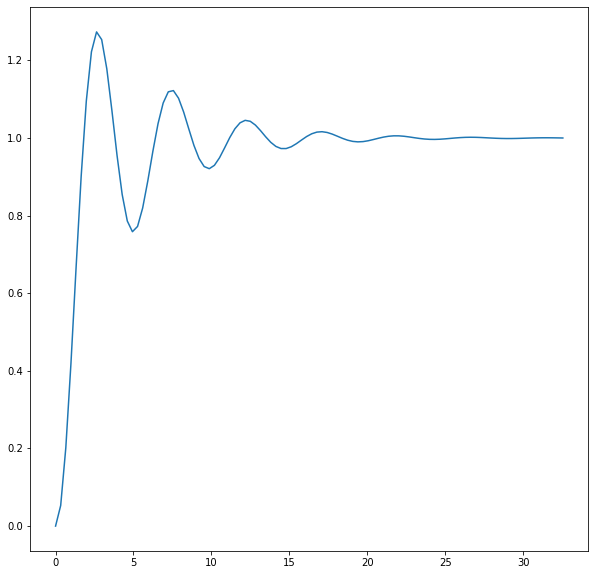

In [ ]:
t, y = step_response(sys)
plt.figure(figsize=(10,10))
plt.plot(t, y)

# **Função custo : loss function**

Aplciando mínimos quadrados para determinar a função de transferência que mais se aproxima dos dados

$\Large \sum_{n=0}^N (y_d - \hat{y})^2$

In [ ]:
def ErroQuadratico(ycubic,xnew,theta0):

# Cria o modelo simulado
   
   num = [theta0[0]]
   den =[theta0[1],theta0[2],theta0[3]]

   sys = TransferFunction(num, den)
   t, yhat = step_response(sys,xnew)
   
   EQ = yhat - ycubic
   return EQ

def objetivo(p):
    return ErroQuadratico(ycubic,xnew,p)

In [ ]:
theta0 = [1,1,2,1]
(theta,kvg) = optimize.leastsq(objetivo,theta0) 
print(theta)

[1.12457984e-01 1.80158908e+09 3.66470015e+03 3.67386959e-02]


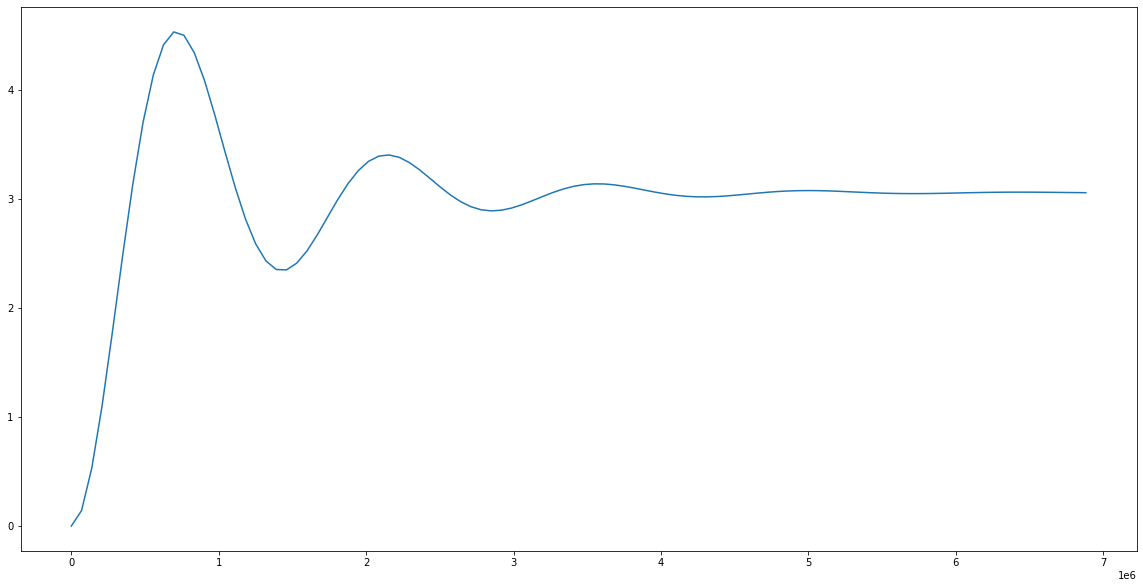

In [ ]:
   num = [theta[0]]
   den =[theta[1],theta[2],theta[3]]

   sys = TransferFunction(num, den)
   t,y = step_response(sys)
   plt.plot(t, y)

In [ ]:
pole(sys)

array([-1.01707437e-06+4.3997663e-06j, -1.01707437e-06-4.3997663e-06j])

In [ ]:
 w = 4.3997663e-06
 T = 2*np.pi/w
 T/(24*3600)

16.528617023688373

$\Large G(s) = \frac{s}{\frac{s}{\omega_c} + 1}$

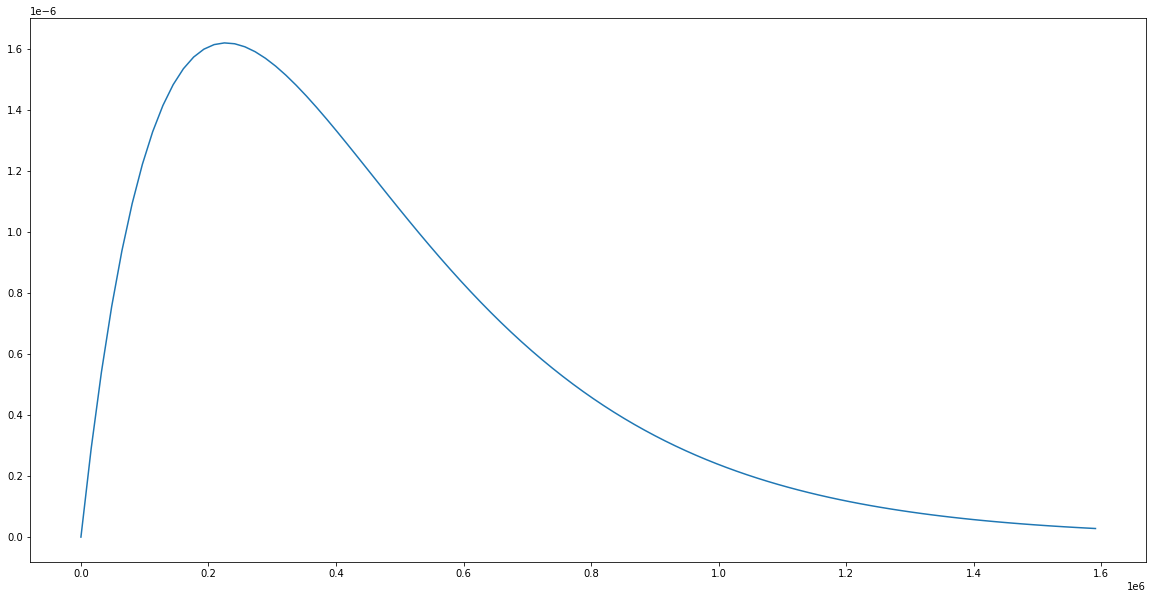

In [ ]:
Nf = [1, 0]
Df = [1/w, 1]

FPB = TransferFunction(1, Df)
Filtro = TransferFunction(Nf, Df)
tf,yf = step_response(Filtro*FPB)
plt.plot(tf, yf)

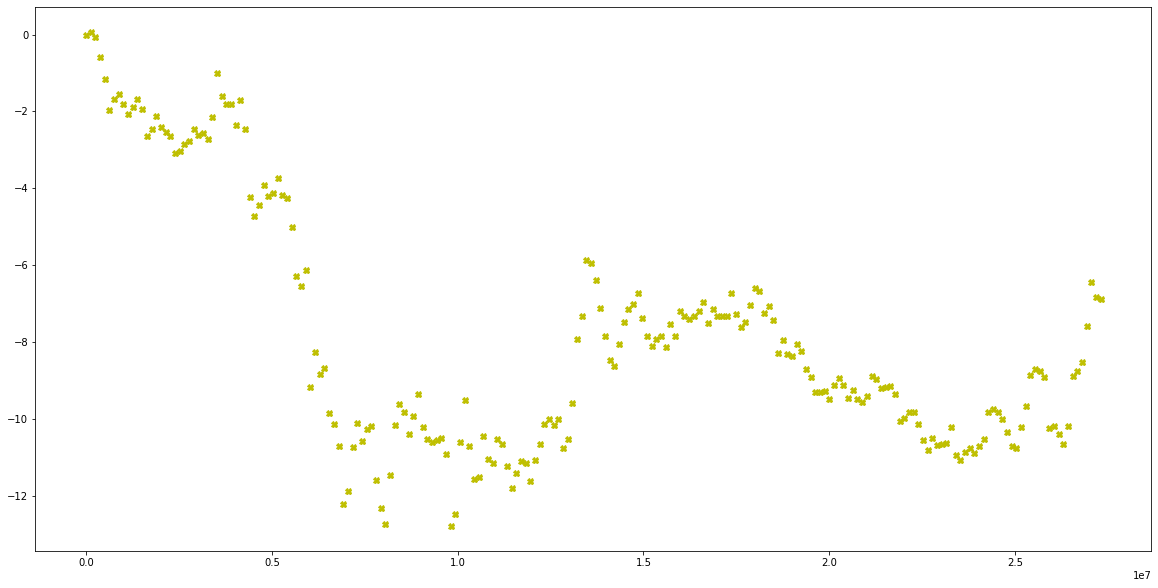

In [ ]:
T = tempo - tempo[0]
U = preco

fc = interpolate.interp1d(T, U, kind='cubic')

xc = np.linspace(T[0], T[-1], len(T))
yc = fc(xc)
yc = yc - yc[0]
plt.plot(xc, yc, 'yX')
plt.show()

In [ ]:

yfiltrado, T, xout = lsim(Filtro, yc, xc )

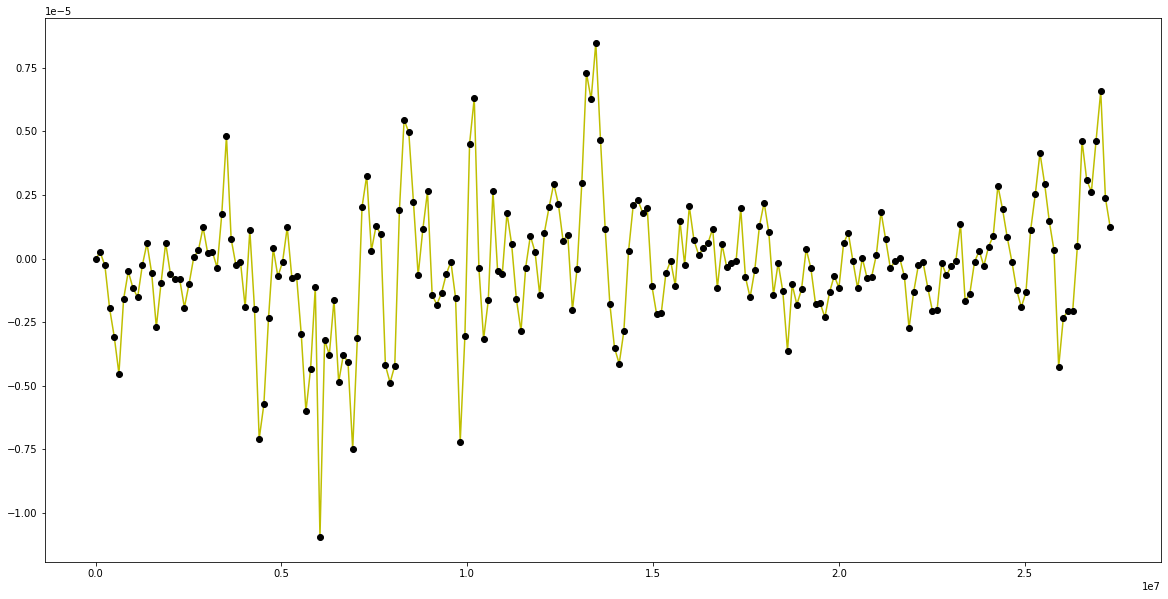

In [ ]:
plt.plot(T, yfiltrado, 'y-')
plt.plot(T, yfiltrado, 'ko')
plt.show()

## **Comparando os resultados**

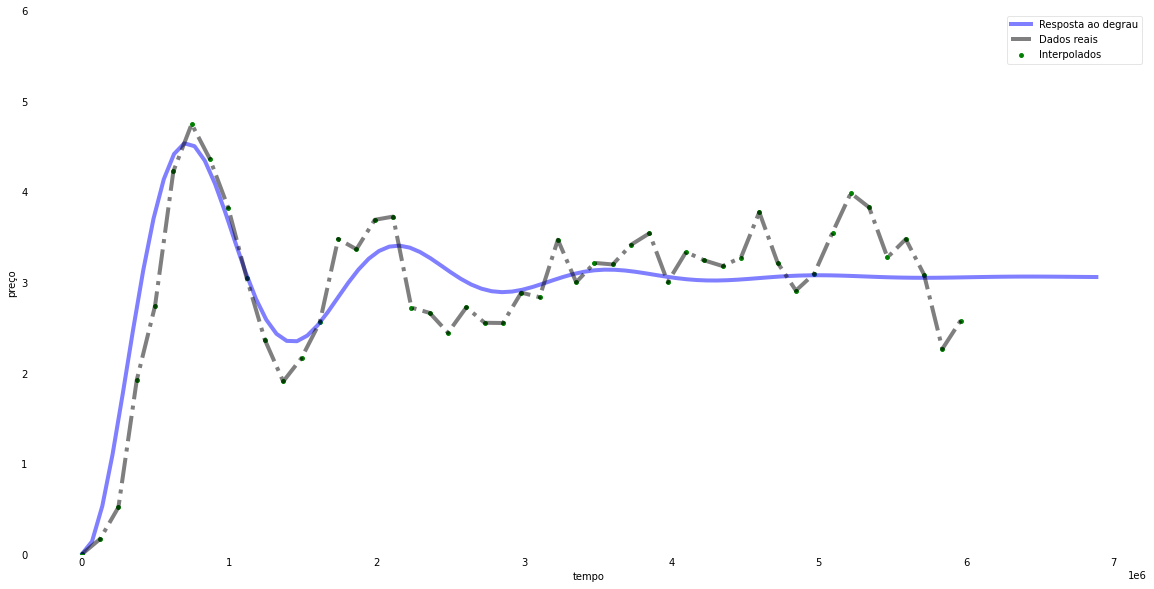

In [ ]:
# Visualizando a evolução da Epidemia - S(t), I(t) e R(t)
fig = plt.figure(facecolor='w',figsize=(20,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, y-y[0], 'b', alpha=0.5, lw=4, label='Resposta ao degrau')
ax.plot(xnew,ycubic, 'k-.', alpha=0.5, lw=4, label='Dados reais')
plt.scatter(xnew,ycubic, marker='o', color='g', label='Interpolados', s=15)
ax.set_xlabel('tempo')
ax.set_ylabel('preço')
ax.set_ylim(0,6)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [ ]:
c2d(sys, 1, method='zoh')


3.121e-11 z + 3.121e-11
-----------------------
     z^2 - 2 z + 1

dt = 1

In [ ]:
theta

array([1.12457984e-01, 1.80158908e+09, 3.66470015e+03, 3.67386959e-02])